In [1]:
####################################################################################################
# SYNCHRONOUS GENERATOR CAPABILITY CURVES GENERATOR
####################################################################################################
# This program was designed to create the capability curves of a synchronous generator
# given the machines' nominal parameters.
# It comprises two functions:
# 1) Capability Curve Generator:
#       generates the capability curve from the current limit curves for the rotor and stator
# 2) Generator Capability Verification:
#       verify wheter a certain load condition can be achieved by a generator
####################################################################################################
# This code was developed using the concepts and electric machinery modeling from Chapman's
# "Electric Machinery Fundamentals", 5th edition and Uman's "Fitzgerald & Kingsley's Electric
#  Machinery", 7th edition.
# The sections used were, respectively, 4.11 (Synchronous Generator Ratings - Synchronous Generator
# Capability Curves, p.254) and 5.5 (Steady-state Operating Characteristics, p.293)
# Along with several mathematical and programming ideas that will be cited when approriate
#  throught the code.
####################################################################################################
# Developed by
#       Felipe Baldner (https://github.com/fbaldner) and
#       Júlia Avellar ()
####################################################################################################
# version 0.1 (2021-12-09):
#      - Initial release
#      - Defines generator input parameters and calculates both curves' data
#      - Plot both curves overlapping each other and prime-mover max power

In [2]:
# Needed libraries
import math as mt
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt
import sympy as sym

In [3]:
# Generator input parameters
Vterminal   = 480       # Terminal voltage, in volt (line voltage)
freq        = 50        # Electrical frequency, in hertz
Srated      = 50e3      # Rated apparent power, in volt-ampere
poles       = 6         # Number of poles
PowerFactor = 0.8       # Power factor, lagging (inductive)
Xsync       = 1         # Synchronous reactance, in ohm per phase

# Load parameters
Pload       = 45e3      # Load that is being supplied by the generator, in watt

# Generator's Losses
Pmech_loss  = 1.5e3     # Mechanical (friction and windage) Losses, in watt
Pcore_loss  = 1e3       # Core Losses, in watt

In [4]:
# Calculations
# Phase voltage, in volt
Vphase          = Vterminal/mt.sqrt(3)

# Maximum armature current, in ampere - absolute value and phasor
Iarm_max        = Srated/(3 * Vphase)
Iarm_max_phasor = Iarm_max*cm.exp(-1j * mt.acos(PowerFactor))

# Origin of rotor current curve
Qrotor          = -(3 * Vphase**2)/Xsync

# Generator's internal generated voltage, in volt
Ea              = Vphase + 1j * Xsync * Iarm_max_phasor

# Apparent power that is the radius of the rotor curve, in volt-ampere
D_E             = (3 * abs(Ea) * Vphase)/Xsync

# Prime-mover maximum output real power, in watt
Pmax_out        = Pload - Pmech_loss - Pcore_loss

In [5]:
# Stator current limit curve
# A circle centered in (0,0) with radius Srated
x_stator_o = 0
y_stator_o = 0
r_stator   = Srated

# Rotor current limit curve
# A circle centered in (0,Q) with radius D_E
x_stator_o = 0
y_stator_o = Qrotor
r_stator   = D_E

# Prime-mover power limit
x_prime = Pmax_out

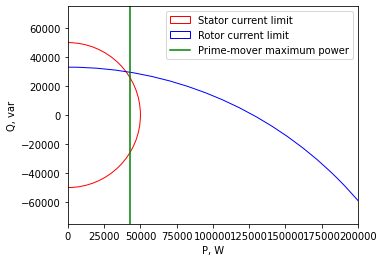

In [6]:
# Plot both curves overlapping each other
stator_curve = plt.Circle((0 , 0)      , Srated , color='r' , fill=False)
rotor_curve  = plt.Circle((0 , Qrotor) , D_E    , color='b' , fill=False)

fig, ax = plt.subplots()

# Plot prime-mover real power limit
maxpower_curve = plt.axvline(x=Pmax_out , color='g' )

xlim_pos = 4*Srated
ylim_neg = -1.5*Srated
ylim_pos =  1.5*Srated

ax.set_xlim((0        , xlim_pos))
ax.set_ylim((ylim_neg , ylim_pos))
ax.set_aspect('equal')

plt.legend((stator_curve           , rotor_curve           , maxpower_curve) ,
           ('Stator current limit' , 'Rotor current limit' , 'Prime-mover maximum power') ,
           numpoints=1,
           loc=1)

plt.xlabel("P, W")
plt.ylabel("Q, var")

ax.add_patch(stator_curve)
ax.add_patch(rotor_curve)